In [19]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%run ../src/utils/dataframe_util.ipynb
%run ../src/utils/eda_util.ipynb

### Import Data Sets

In [6]:
#importing the datasets
df = load_datasets("../data/data.csv")

### Exploratory Data Analysis

In [7]:
#check the data
df.head(20)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [8]:
# Analyse of data
df.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


In [9]:
# Check data types of data
df.dtypes

Sentence     object
Sentiment    object
dtype: object

In [10]:
# Check null values
print_null_summary(df, "data")

Null values in data:
+----------+---------------+----------+
| Column   | Null Values   | Out of   |
|----------+---------------+----------|
+----------+---------------+----------+



In [11]:
print(df['Sentiment'].value_counts())  # Sentiment class distribution

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


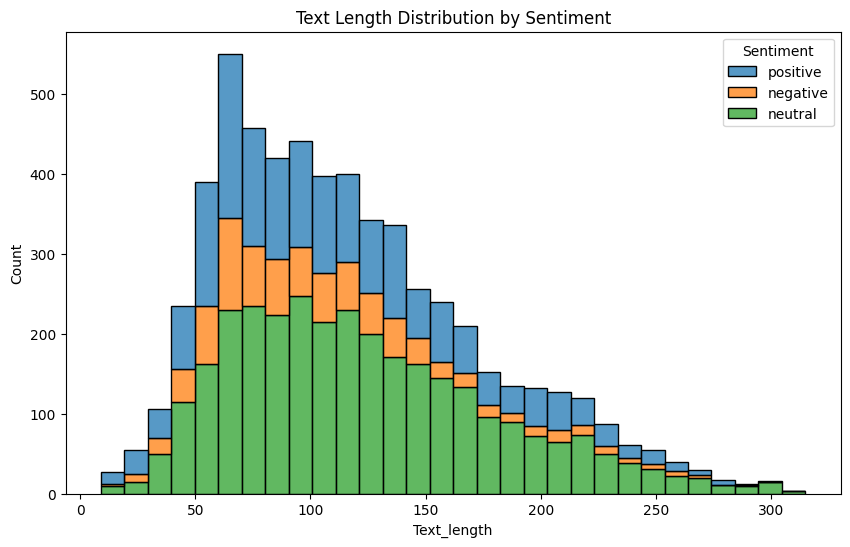

In [15]:
# Text Length Analysis
df['Text_length'] = df['Sentence'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Text_length', hue='Sentiment', multiple="stack", bins=30)
plt.title('Text Length Distribution by Sentiment')
plt.show()

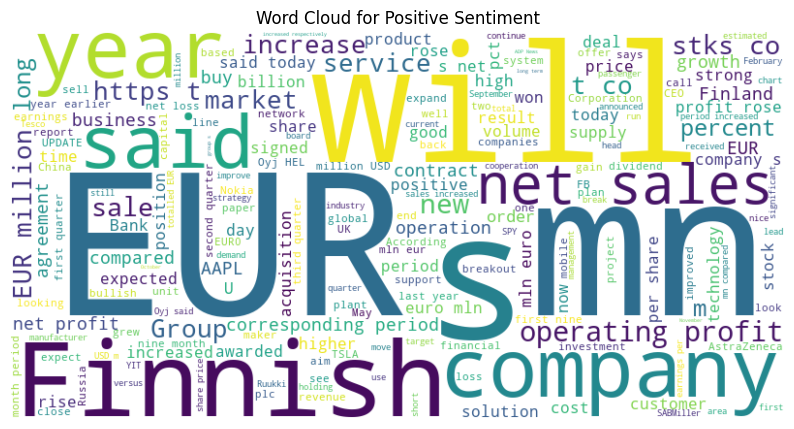

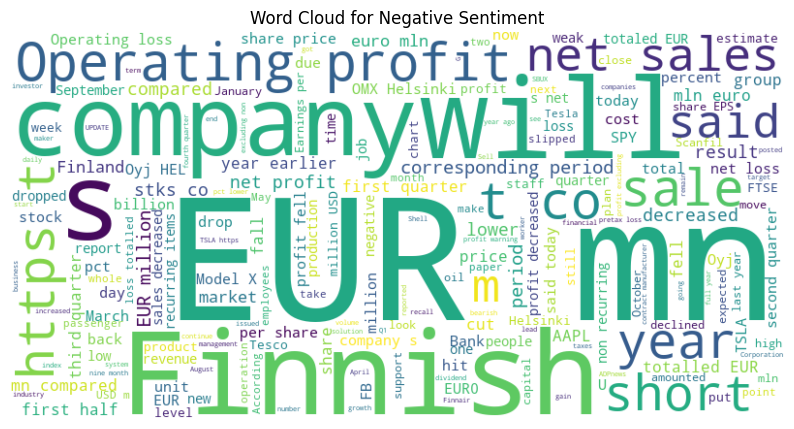

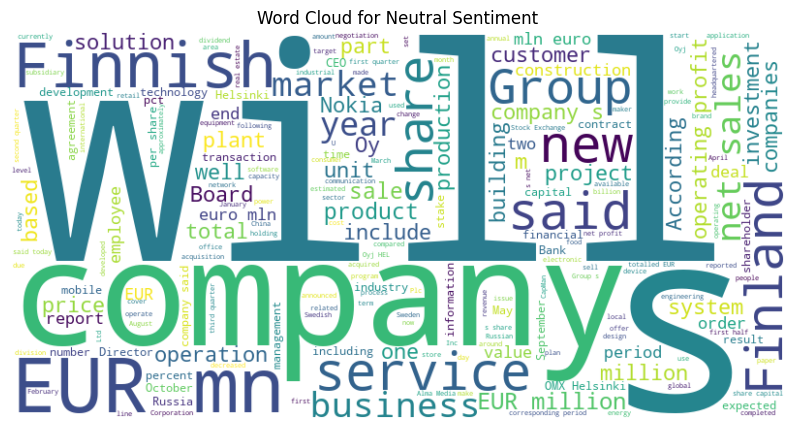

In [20]:
# Word Cloud for Each Sentiment
def plot_wordcloud(sentiment):
    text = ' '.join(df[df['Sentiment'] == sentiment]['Sentence'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    plt.show()

plot_wordcloud('positive')
plot_wordcloud('negative')
plot_wordcloud('neutral')

C:\Users\User\AppData\Local\Temp\ipykernel_26764\1150159786.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


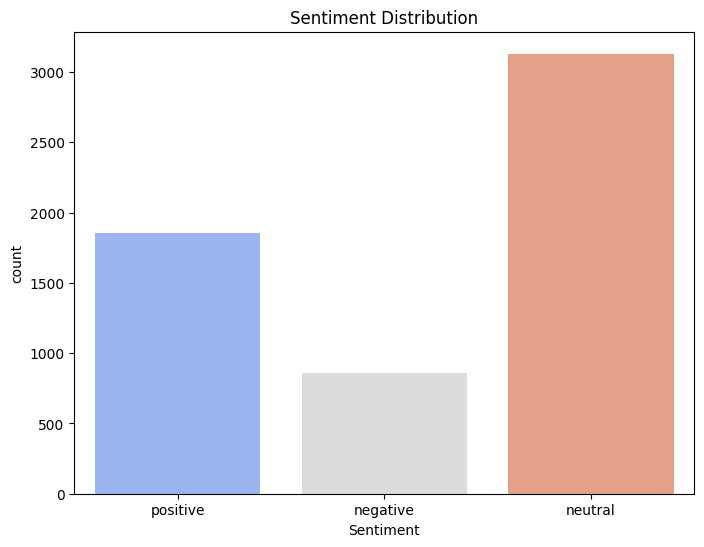

In [21]:
# Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()

In [22]:
# Common Words Analysis (Unigrams)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Sentence'])

In [23]:
# Convert to DataFrame
word_count_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_count_df['Sentiment'] = df['Sentiment']

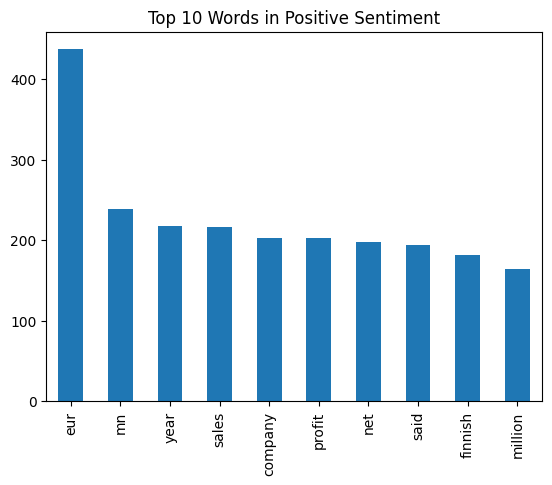

In [24]:
# Visualize top common words for positive sentiment
positive_words = word_count_df[df['Sentiment'] == 'positive'].drop('Sentiment', axis=1).sum().sort_values(ascending=False).head(10)
positive_words.plot(kind='bar', title='Top 10 Words in Positive Sentiment')
plt.show()

In [26]:
# N-gram Analysis
vectorizer_2 = CountVectorizer(ngram_range=(2, 2), stop_words='english')  # Bigram example
X_2 = vectorizer_2.fit_transform(df['Sentence'])
bigram_df = pd.DataFrame(X_2.toarray(), columns=vectorizer_2.get_feature_names_out())

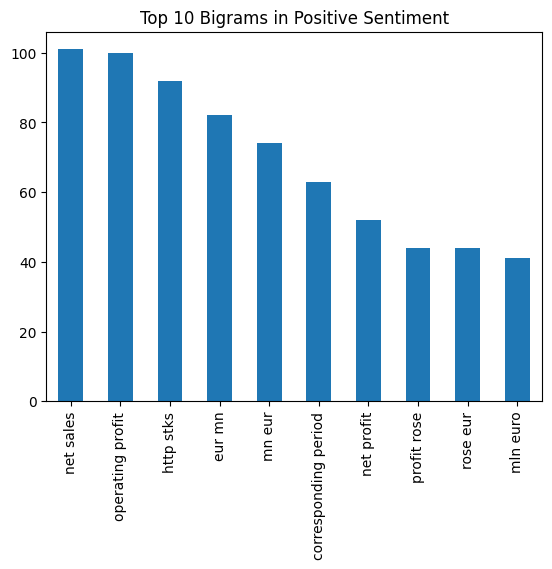

In [27]:
# Visualize most common bigrams for positive sentiment
positive_bigrams = bigram_df[df['Sentiment'] == 'positive'].sum().sort_values(ascending=False).head(10)
positive_bigrams.plot(kind='bar', title='Top 10 Bigrams in Positive Sentiment')
plt.show()